   ##    LOAN PREDICTION  WITH PYTHON

<img src="front_page.png" width="800" />

### Clearing The Memory

In [1]:
%reset -f

## Importing Modules

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm      
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
plt.style.use('seaborn-dark')
sns.set()

## Importing and Analyzing the DataSet

In [3]:
# Importing the DataSet
path = 'train(loan).csv'
df = pd.read_csv(path)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Checking the variable count in each column
df.count()

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [6]:
#Checking the amount of null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Analysing the numeric columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Exploratory Data Analysis

In [8]:
#Checking the value count of the variables in the target(Loan_Status) column
df.Loan_Status.value_counts(ascending=True)

N    192
Y    422
Name: Loan_Status, dtype: int64

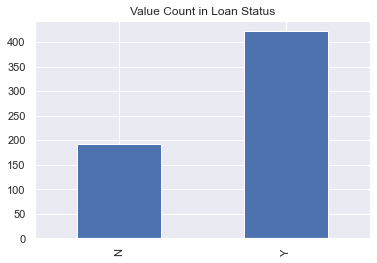

In [9]:
#Ploting the value count
df.Loan_Status.value_counts(ascending=True).plot(kind ='bar', grid = True);
plt.title('Value Count in Loan Status');

In [10]:
#df.Loan_Status = df[['Loan_Status']].apply(lambda x: x.map({'Y':1, 'N':0}))

In [11]:
#Checking the columns data types
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
#Droping the Loan_ID column
df.drop('Loan_ID', axis = 1, inplace = True)

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
#Creating a new column in the DataFrame
hold_this = df[['Loan_Status']].copy()
df['Loan_Status_Mapped'] = hold_this.apply(lambda x: x.map({'Y':1,'N':0}))

In [15]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Mapped
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [16]:
#Checking the value count of the variables in the Gender column
df.Gender.value_counts(ascending=True)

Female    112
Male      489
Name: Gender, dtype: int64

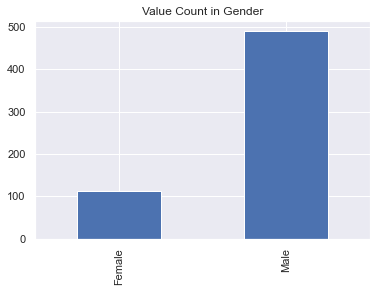

In [17]:
#Ploting the value count
df.Gender.value_counts(ascending=True).plot(kind = 'bar', grid = True);
plt.title('Value Count in Gender');

In [18]:
#Rato of Gender and Loan Status
pd.crosstab(index = [df.Gender], columns = df.Loan_Status)

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


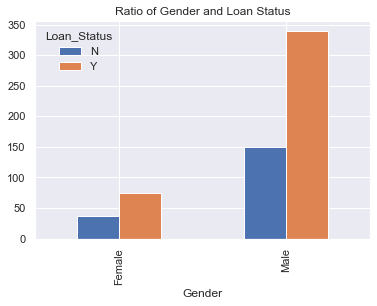

In [19]:
#Ploting the Ratio
pd.crosstab(index = [df.Gender], columns = df.Loan_Status).plot(kind = 'bar', grid = True);
plt.title('Ratio of Gender and Loan Status');

In [20]:
#Checking the probability of Gender and getting a loan
prob_gender_loan = df.pivot_table(values = 'Loan_Status',
                        index = ['Gender'],
                        aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
prob_gender_loan

,Loan_Status
Gender,
Female,0.669643
Male,0.693252


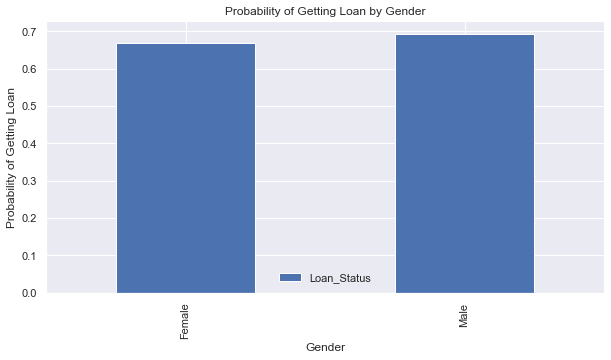

In [21]:
#Plotting the prob_gender_loan
ax =  prob_gender_loan.plot(kind = 'bar', figsize = (10,5), grid = True);
ax.set_ylabel('Probability of Getting Loan')
ax.set_title('Probability of Getting Loan by Gender');

In [22]:
#Checking the value count of the variables in the Property_Area column
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

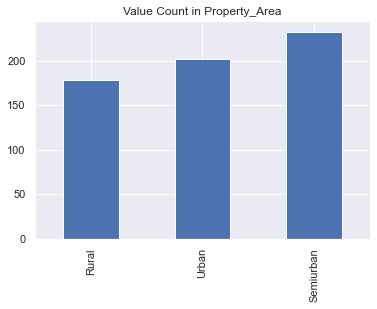

In [23]:
#Ploting the value count
df.Property_Area.value_counts(ascending=True).plot(kind = 'bar', grid = True);
plt.title('Value Count in Property_Area');

In [24]:
#Rato of Property_Area and Loan Status
pd.crosstab(index = [df.Property_Area], columns = df.Loan_Status)

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


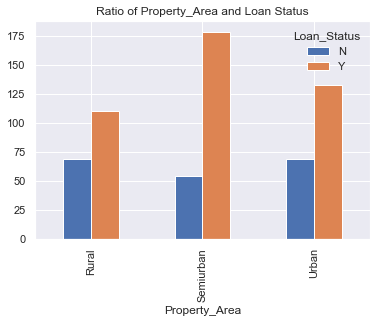

In [25]:
#Rato of Property_Area and Loan Status
pd.crosstab(index = [df.Property_Area], columns = df.Loan_Status).plot(kind = 'bar', grid = True);
plt.title('Ratio of Property_Area and Loan Status');

In [26]:
#Checking the probability of Property_Area and getting a loan
prob_property_area_loan = df.pivot_table(values = 'Loan_Status',
                            index = ['Property_Area'],
                            aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
prob_property_area_loan

,Loan_Status
Property_Area,
Rural,0.614525
Semiurban,0.768240
Urban,0.658416


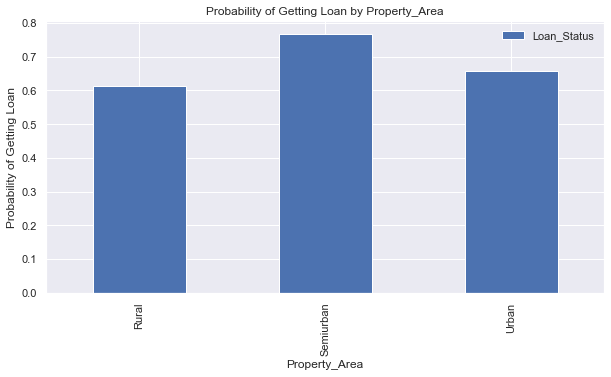

In [27]:
#Plotting the prob_gender_loan
ax =  prob_property_area_loan.plot(kind = 'bar', figsize = (10,5), grid = True);
ax.set_ylabel('Probability of Getting Loan')
ax.set_title('Probability of Getting Loan by Property_Area');

In [28]:
#Number of values in the ApplicantIncome column
df.ApplicantIncome.count()

614

In [29]:
#Summary of applicant income column
print(f'The minimum applicant income is ${df.ApplicantIncome.min()}')
print(f'The maximum applicant income is ${df.ApplicantIncome.max()}')
print(f'The average applicant income is ${df.ApplicantIncome.mean()}')
print(f'The middle value in the range of applicant income is ${df.ApplicantIncome.median()}')
print(f'The applicant income that appears the most is ${stats.mode(df.ApplicantIncome)[0][0]}\
 and it appears {stats.mode(df.ApplicantIncome)[1][0]} times')

The minimum applicant income is $150
The maximum applicant income is $81000
The average applicant income is $5403.459283387622
The middle value in the range of applicant income is $3812.5
The applicant income that appears the most is $2500 and it appears 9 times


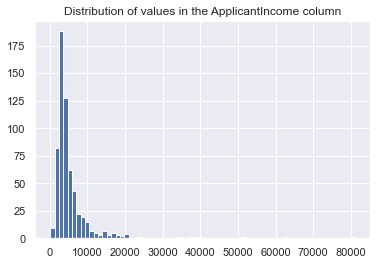

In [30]:
#Show the distribution of values in the ApplicantIncome column
df.ApplicantIncome.hist(bins=70, grid = True);
plt.title('Distribution of values in the ApplicantIncome column');

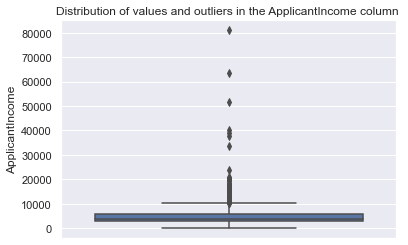

In [31]:
#Show the distribution of values in the ApplicantIncome column
sns.set()
sns.boxplot(y='ApplicantIncome',data=df);
plt.title('Distribution of values and outliers in the ApplicantIncome column ');

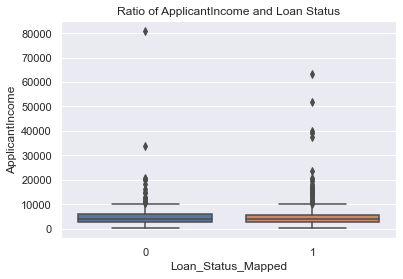

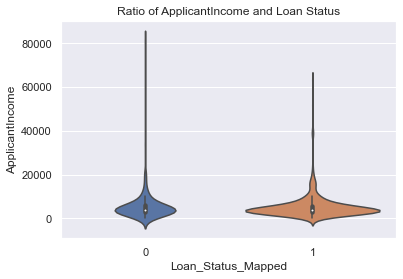

In [32]:
#Plot the ApplicantIncome against the new column
sns.set()
sns.boxplot(y='ApplicantIncome' ,x='Loan_Status_Mapped',data=df);
plt.title('Ratio of ApplicantIncome and Loan Status');
plt.show()
sns.violinplot(y='ApplicantIncome' ,x='Loan_Status_Mapped',data=df, scale='count');
plt.title('Ratio of ApplicantIncome and Loan Status');
    

In [33]:
#Checking the value count of the variables in the Married column
df.Married.value_counts(ascending=True)

No     213
Yes    398
Name: Married, dtype: int64

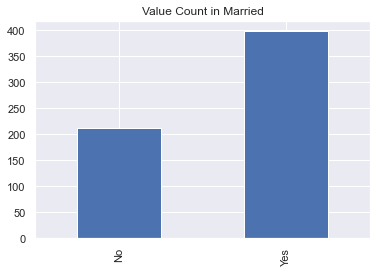

In [34]:
#Ploting the value count
df.Married.value_counts(ascending=True).plot(kind = 'bar', grid = True);
plt.title('Value Count in Married');


In [35]:
#Rato of Married and Loan Status
pd.crosstab(index = [df.Married], columns = df.Loan_Status)

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,285


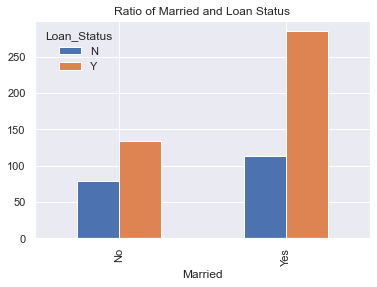

In [36]:
#Ploting the Ratio
pd.crosstab(index = [df.Married], columns = df.Loan_Status).plot(kind = 'bar', grid = True);
plt.title('Ratio of Married and Loan Status');

In [37]:
#Checking the probability of Married and getting a loan
prob_married_loan = df.pivot_table(values = 'Loan_Status',
                        index = ['Married'],
                        aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
prob_married_loan

,Loan_Status
Married,
No,0.629108
Yes,0.716080


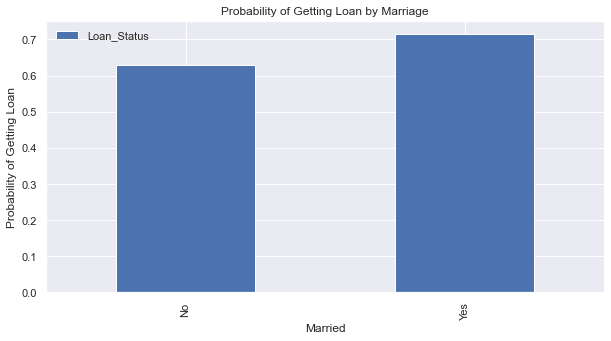

In [38]:
#Plotting the prob_married_loan
ax =  prob_married_loan.plot(kind = 'bar', figsize = (10,5), grid = True);
ax.set_ylabel('Probability of Getting Loan')
ax.set_title('Probability of Getting Loan by Marriage');

In [39]:
#Checking the value count of the variables in the Dependents column
df.Dependents.value_counts(ascending=True)

3+     51
2     101
1     102
0     345
Name: Dependents, dtype: int64

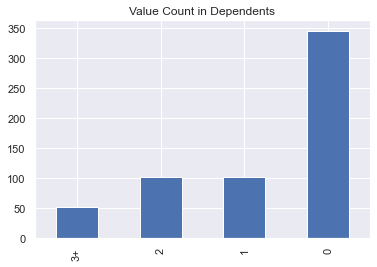

In [40]:
#Ploting the value count
df.Dependents.value_counts(ascending=True).plot(kind = 'bar', grid = True);
plt.title('Value Count in Dependents');

In [41]:
#Rato of Dependents and Loan Status
pd.crosstab(index = [df.Dependents], columns = df.Loan_Status)

Loan_Status,N,Y
Dependents,,
0,107,238
1,36,66
2,25,76
3+,18,33


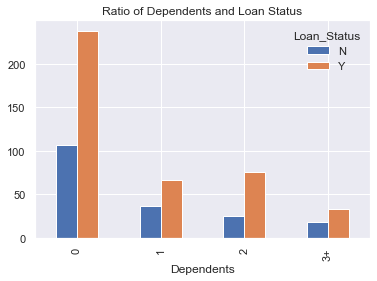

In [42]:
#Ploting the Ratio
pd.crosstab(index = [df.Dependents], columns = df.Loan_Status).plot(kind = 'bar', grid = True);
plt.title('Ratio of Dependents and Loan Status');

In [43]:
#Checking the probability of Dependents and getting a loan
prob_dependents_loan = df.pivot_table(values = 'Loan_Status',
                        index = ['Dependents'],
                        aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
prob_dependents_loan

,Loan_Status
Dependents,
0,0.689855
1,0.647059
2,0.752475
3+,0.647059


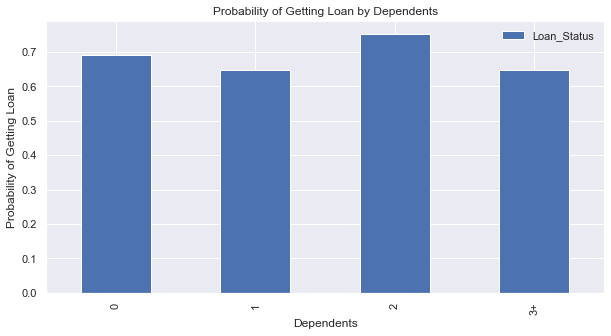

In [44]:
#Plotting the prob_dependents_loan
ax =  prob_dependents_loan.plot(kind = 'bar', figsize = (10,5), grid = True);
ax.set_ylabel('Probability of Getting Loan')
ax.set_title('Probability of Getting Loan by Dependents');

In [45]:
#Checking the value count of the variables in the Gender column
df.Education.value_counts(ascending=True)

Not Graduate    134
Graduate        480
Name: Education, dtype: int64

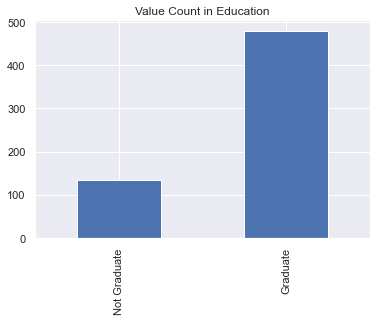

In [46]:
#Ploting the value count
df.Education.value_counts(ascending=True).plot(kind = 'bar', grid = True);
plt.title('Value Count in Education');

In [47]:
#Rato of Education and Loan Status
pd.crosstab(index = [df.Education], columns = df.Loan_Status)

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


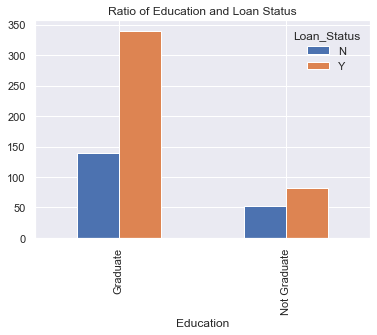

In [48]:
#Ploting the Ratio
pd.crosstab(index = [df.Education], columns = df.Loan_Status).plot(kind = 'bar', grid = True);
plt.title('Ratio of Education and Loan Status');

In [49]:
#Checking the probability of Education and getting a loan
prob_education_loan = df.pivot_table(values = 'Loan_Status',
                        index = ['Education'],
                        aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
prob_education_loan

,Loan_Status
Education,
Graduate,0.708333
Not Graduate,0.611940


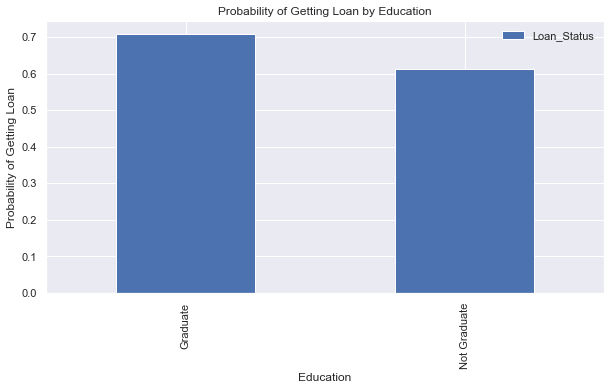

In [50]:
#Plotting the prob_education_loan
ax =  prob_education_loan.plot(kind = 'bar', figsize = (10,5), grid = True);
ax.set_ylabel('Probability of Getting Loan')
ax.set_title('Probability of Getting Loan by Education');

In [51]:
#Checking the value count of the variables in the Self_Employed column
df.Self_Employed.value_counts(ascending=True)

Yes     82
No     500
Name: Self_Employed, dtype: int64

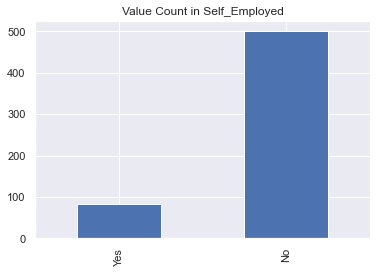

In [52]:
#Ploting the value count
df.Self_Employed.value_counts(ascending=True).plot(kind = 'bar', grid = True);
plt.title('Value Count in Self_Employed');

In [53]:
#Rato of Self_Employed and Loan Status
pd.crosstab(index = [df.Self_Employed], columns = df.Loan_Status)

Loan_Status,N,Y
Self_Employed,,
No,157,343
Yes,26,56


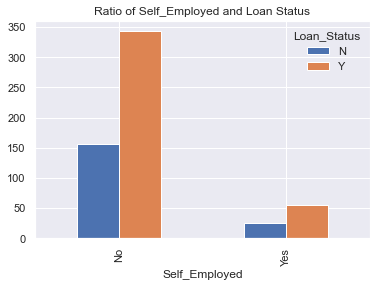

In [54]:
#Ploting the Ratio
pd.crosstab(index = [df.Self_Employed], columns = df.Loan_Status).plot(kind = 'bar', grid = True);
plt.title('Ratio of Self_Employed and Loan Status');

In [55]:
#Checking the probability of Self_Employed and getting a loan
prob_self_employed_loan = df.pivot_table(values = 'Loan_Status',
                        index = ['Self_Employed'],
                        aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
prob_self_employed_loan

,Loan_Status
Self_Employed,
No,0.686000
Yes,0.682927


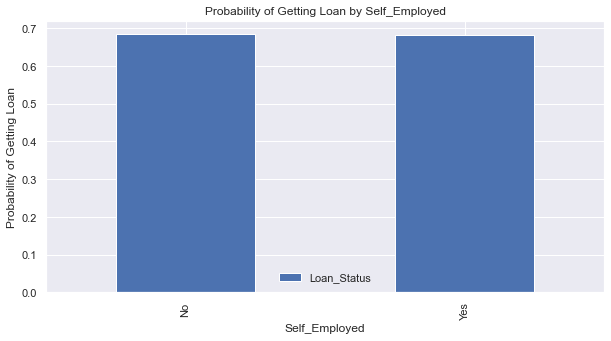

In [56]:
#Plotting the prob_self_employed_loan
ax =  prob_self_employed_loan.plot(kind = 'bar', figsize = (10,5), grid = True);
ax.set_ylabel('Probability of Getting Loan')
ax.set_title('Probability of Getting Loan by Self_Employed');

In [57]:
#Checking the value count of the variables in the CoapplicantIncome column
df.CoapplicantIncome.count()

614

In [58]:
#Summary of co-applicant income column
print(f'The minimum co-applicant income is ${df.CoapplicantIncome.min()}')
print(f'The maximum co-applicant income is ${df.CoapplicantIncome.max()}')
print(f'The average co-applicant income is ${df.CoapplicantIncome.mean()}')
print(f'The middle value in the range of co-applicant income is ${df.CoapplicantIncome.median()}')
print(f'The co-applicant income that appears the most is ${stats.mode(df.CoapplicantIncome)[0][0]}\
 and it appears {stats.mode(df.CoapplicantIncome)[1][0]} times')

The minimum co-applicant income is $0.0
The maximum co-applicant income is $41667.0
The average co-applicant income is $1621.245798027101
The middle value in the range of co-applicant income is $1188.5
The co-applicant income that appears the most is $0.0 and it appears 273 times


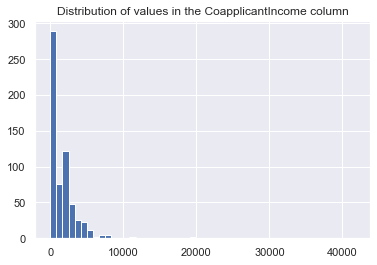

In [59]:
#Show the distribution of values in the CoapplicantIncome column
df.CoapplicantIncome.hist(bins=50, grid = True);
plt.title('Distribution of values in the CoapplicantIncome column');

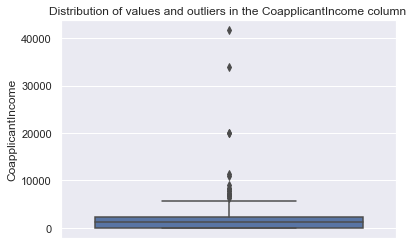

In [60]:
#Show the distribution of values in the CoapplicantIncome column
sns.set()
sns.boxplot(y='CoapplicantIncome',data=df);
plt.title('Distribution of values and outliers in the CoapplicantIncome column ');

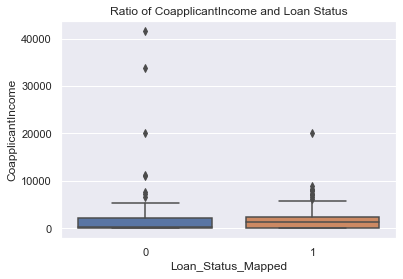

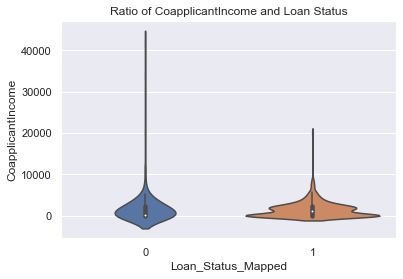

In [61]:
#Plot the CoapplicantIncome against the new column
sns.set()
sns.boxplot(y='CoapplicantIncome' ,x='Loan_Status_Mapped',data=df);
plt.title('Ratio of CoapplicantIncome and Loan Status');
plt.show()
sns.violinplot(y='CoapplicantIncome' ,x='Loan_Status_Mapped',data=df, scale='count');
plt.title('Ratio of CoapplicantIncome and Loan Status');

In [62]:
#Checking the value count of the variables in the LoanAmount column
df.LoanAmount.count()

592

In [63]:
#Summary of loan amount column
print(f'The minimum loan amount is ${df.LoanAmount.min()}')
print(f'The maximum loan amount is ${df.LoanAmount.max()}')
print(f'The average loan amount is ${df.LoanAmount.mean()}')
print(f'The middle value in the range of loan amount is ${df.LoanAmount.median()}')
print(f'The loan amount that appears the most is ${stats.mode(df.LoanAmount)[0][0]}\
 and it appears {stats.mode(df.LoanAmount)[1][0]} times')

The minimum loan amount is $9.0
The maximum loan amount is $700.0
The average loan amount is $146.41216216216216
The middle value in the range of loan amount is $128.0
The loan amount that appears the most is $120.0 and it appears 20 times


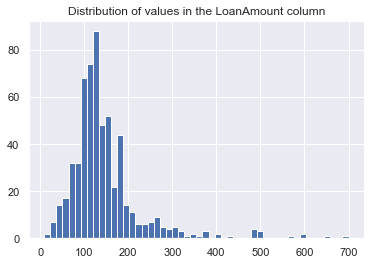

In [64]:
#Show the distribution of values in the LoanAmount column
df.LoanAmount.hist(bins=50, grid = True);
plt.title('Distribution of values in the LoanAmount column');

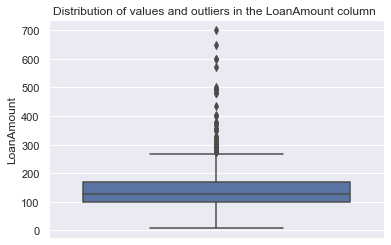

In [65]:
#Show the distribution of values in the LoanAmount column
sns.set()
sns.boxplot(y='LoanAmount',data=df);
plt.title('Distribution of values and outliers in the LoanAmount column ');


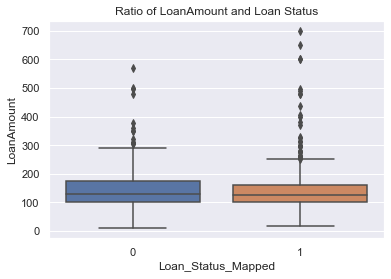

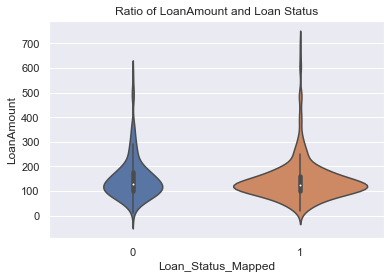

In [66]:
#Plot the LoanAmount against the new column
sns.set()
sns.boxplot(y='LoanAmount' ,x='Loan_Status_Mapped',data=df);
plt.title('Ratio of LoanAmount and Loan Status');
plt.show()
sns.violinplot(y='LoanAmount' ,x='Loan_Status_Mapped',data=df, scale='count');
plt.title('Ratio of LoanAmount and Loan Status');

In [67]:
#Checking the value count of the variables in the Loan_Amount_Term column
df.Loan_Amount_Term.count()

600

In [68]:
#Summary of loan amount term column
print(f'The minimum loan amount term is ${df.Loan_Amount_Term.min()}')
print(f'The maximum loan amount term is ${df.Loan_Amount_Term.max()}')
print(f'The average loan amount term is ${df.Loan_Amount_Term.mean()}')
print(f'The middle value in the range of loan amount term is ${df.Loan_Amount_Term.median()}')
print(f'The loan amount term that appears the most is ${stats.mode(df.Loan_Amount_Term)[0][0]}\
 and it appears {stats.mode(df.Loan_Amount_Term)[1][0]} times')

The minimum loan amount term is $12.0
The maximum loan amount term is $480.0
The average loan amount term is $342.0
The middle value in the range of loan amount term is $360.0
The loan amount term that appears the most is $360.0 and it appears 512 times


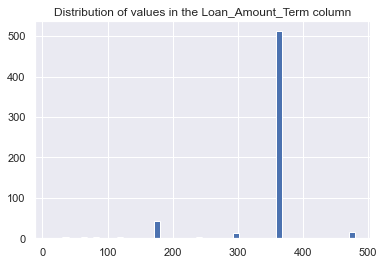

In [69]:
#Show the distribution of values in the Loan_Amount_Term column
df.Loan_Amount_Term.hist(bins=50, grid = True);
plt.title('Distribution of values in the Loan_Amount_Term column');

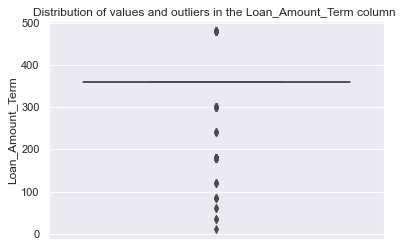

In [70]:
#Show the distribution of values in the Loan_Amount_Term column
sns.set()
sns.boxplot(y='Loan_Amount_Term',data=df);
plt.title('Distribution of values and outliers in the Loan_Amount_Term column ');

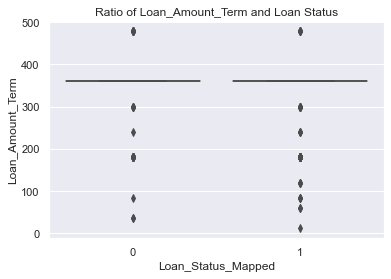

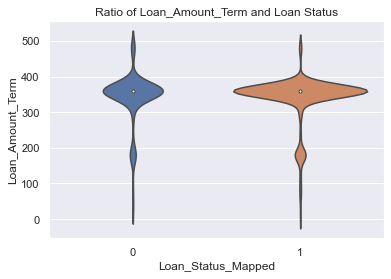

In [71]:
#Plot the Loan_Amount_Term against the new column
sns.set()
sns.boxplot(y='Loan_Amount_Term' ,x='Loan_Status_Mapped',data=df);
plt.title('Ratio of Loan_Amount_Term and Loan Status');
plt.show()
sns.violinplot(y='Loan_Amount_Term' ,x='Loan_Status_Mapped',data=df, scale='count');
plt.title('Ratio of Loan_Amount_Term and Loan Status');

In [72]:
#Checking the value count of the variables in the Credit_History column
df.Credit_History.value_counts(ascending=True)


0.0     89
1.0    475
Name: Credit_History, dtype: int64

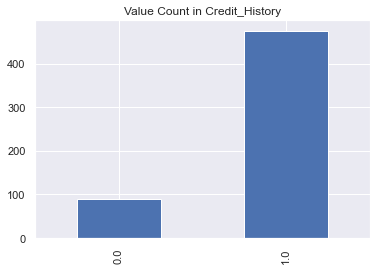

In [73]:
#Ploting the value count
df.Credit_History.value_counts(ascending=True).plot(kind = 'bar', grid = True);
plt.title('Value Count in Credit_History');

In [74]:
#Rato of Credit_History and Loan Status
pd.crosstab(index = [df.Credit_History], columns = df.Loan_Status)

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


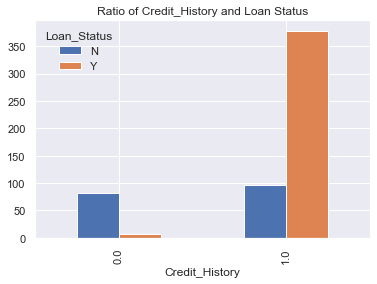

In [75]:
#Ploting the Ratio
pd.crosstab(index = [df.Credit_History], columns = df.Loan_Status).plot(kind = 'bar', grid = True);
plt.title('Ratio of Credit_History and Loan Status');

In [76]:
#Checking the probability of Credit_History and getting a loan
prob_credit_history_loan = df.pivot_table(values = 'Loan_Status',
                        index = ['Credit_History'],
                        aggfunc = lambda x: x.map({'Y':1, 'N':0}).mean())
prob_credit_history_loan

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


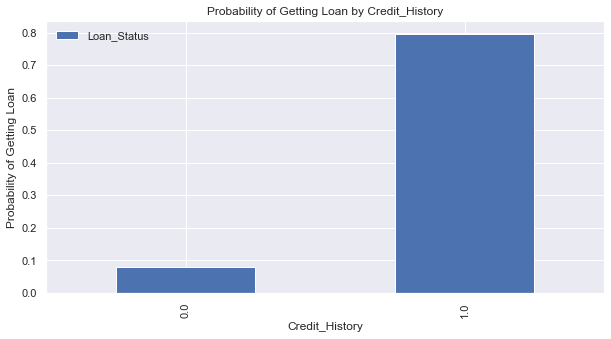

In [77]:
#Plotting the prob_credit_history_loan
ax =  prob_credit_history_loan.plot(kind = 'bar', figsize = (10,5), grid = True);
ax.set_ylabel('Probability of Getting Loan')
ax.set_title('Probability of Getting Loan by Credit_History');

From my analyis I can tell the columns that will have more effect in predicting the 
loan status based on the difference in the probability of loan status are:
1. Credit_History = 72%  difference
2. Property_Area = 11% difference
3. Education = 9.9% difference
4. Married = 9% difference
5. Dependents = 6% difference

## HANDLING NULL VALUES

In [78]:
#Check null values
df.isnull().sum()

Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
Loan_Status_Mapped     0
dtype: int64

In [79]:
#Fill in the null values with the mode
df['Self_Employed'].fillna('No',inplace=True)
df.Gender.fillna(df.Gender.mode()[0], inplace = True)
df.Married.fillna(df.Married.mode()[0], inplace = True)
df.Dependents.fillna(df.Dependents.mode()[0], inplace = True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mode()[0], inplace = True)
df.Credit_History.fillna(df.Credit_History.mode()[0], inplace = True)

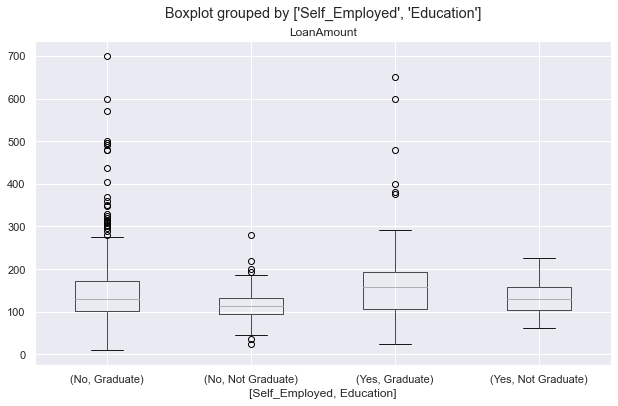

In [80]:
#Loan amount varies based on Self_Employed and Education
df.boxplot(column = 'LoanAmount', by = ['Self_Employed','Education'], figsize = (10,6), grid = True);

In [81]:
#Create a table of of the ratio of self employed and education
table =  df.pivot_table(values = 'LoanAmount', index = 'Self_Employed',
                       columns = 'Education', aggfunc = np.median)

#Define function to return value of the pivot_table
def get_loan_amount(x):
    return table.loc[x['Self_Employed'], x['Education']]
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [82]:
#Replace missing values in loan amount using the table as the reference
placeholder= df[['Self_Employed', 'Education']]
df.LoanAmount.fillna(placeholder.apply(get_loan_amount,axis = 1),inplace = True)

In [83]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
Loan_Status_Mapped    0
dtype: int64

## FITTING THE DATA

In [84]:
#Create a new DataFrame using a copy of the orignal
df2 = df.copy()

In [85]:
#Encode the categorical columns being used in the model training
var_mod = [  'Education', 'Married']

le = LabelEncoder()

for i in var_mod:
    df2[i] = le.fit_transform(df[i])
    
df2.dtypes

Gender                 object
Married                 int32
Dependents             object
Education               int32
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
Loan_Status_Mapped      int64
dtype: object

In [86]:
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Status_Mapped
0,Male,0,0,0,No,5849,0.0,130.0,360.0,1.0,Urban,Y,1
1,Male,1,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Male,1,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Male,1,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,Male,0,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


In [87]:
#Create dummy columns for columns with moe than one categorical value
X = ['Credit_History','Property_Area','Education','Married','Dependents']
y = 'Loan_Status'
dummy_data = pd.get_dummies(df2[X])
dummy_data['Loan_Status'] = df2.Loan_Status_Mapped.copy()
dummy_data.head()

,Credit_History,Education,Married,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Loan_Status
0,1.0,0,0,0,0,1,1,0,0,0,1
1,1.0,0,1,1,0,0,0,1,0,0,0
2,1.0,0,1,0,0,1,1,0,0,0,1
3,1.0,1,1,0,0,1,1,0,0,0,1
4,1.0,0,0,0,0,1,1,0,0,0,1


In [88]:
#Get the column index
new_X = dummy_data.columns[:-1]

## SPLIT THE DATA, TRAIN TEST, CROSS VALIDATION, FEATURE IMPORTANCE

## CLASSIFICATION SUMMARY REPORT

In [89]:
#Generic function for making classification model and accessing performance

def classification_model(model, data, predictors, outcome):
    
    X = data[predictors]
    y = data[outcome]
    
    #Perform stratified k-fold cross-validation with 5 folds
    
    skf = StratifiedKFold()

    print(f'\n[number of cross validation splits = {skf.get_n_splits(data)}]\n\n')
    
    accuracy_train_hold = []
    accuracy_test_hold = []
    finder = str(model).find('(')
    col = X.columns.values.reshape(-1,1)
    
    
    for train_index, test_index in skf.split(X, y):
        
        #Filter training data
        train_features = X.iloc[train_index,:]
        
        #Filter the target variables
        train_target = y.iloc[train_index]
        
        
        #Training the algorithm using the predictors and target
        model.fit(train_features, train_target)
        
        
        #Filter testing data
        test_features = X.iloc[test_index,:]
        
        #Filter the target test variables
        test_target = y.iloc[test_index]
        
        
        #Fit the model
        model.fit(train_features,train_target)
        
        #Make predictions on the training set
        predictions_train = model.predict(train_features)
        
        #Record accuracy rom each cross-validation run of train
        accuracy_train = metrics.accuracy_score(predictions_train, train_target)
        accuracy_train_hold.append(accuracy_train)
        
        #Make predictions on the testing set
        predictions_test = model.predict(test_features)

        #Record accuracy rom each cross-validation run of test
        accuracy_test = metrics.accuracy_score(predictions_test, test_target)
        accuracy_test_hold.append(accuracy_test)
        
        
    #Print out train classification report title
    print('      '*4 + '### TRAIN SUMMARY ###\n\n')
    
    #Print out the train classification report
    print('\n','  '*5 \
          + '{} Classification Report \n\n{}'.format(str(model)[0:finder],
                                                               classification_report(train_target,predictions_train)))
    
    #Print out the train confusion matrix
    
    _confusion_matrix_train = pd.DataFrame(confusion_matrix(train_target,predictions_train),columns = ['true_positive','true_negative'],
             index = ['predicted_positive','predicted_negative'])
    
    print('\n','   '*8+'Confusion Matrix \n\n',_confusion_matrix_train)
    
    
    
    #Print out the train accuracy
    print('\n\nTrain Accuracy List : {} \n'.format(accuracy_train_hold))
    print('Average Train Accuracy is : {}% \n\n'.format(round(100*np.mean(accuracy_train_hold),3)))
    
    #Print out line that divides train classification report summary from test classification report summary
    print('#'*127) 
    
    #Print out test classification report title
    print('\n\n','      '*4 + '### TEST SUMMARY ###\n\n')
    
    #Print out the test classification report
    print('\n\n','  '*5 \
          + '{} Classification Report \n\n{}'.format(str(model)[0:finder],
                                                              classification_report(test_target,predictions_test)))
    

    #Print out the test confusion matrix
    
    _confusion_matrix_test = pd.DataFrame(confusion_matrix(test_target,predictions_test),columns = ['true_positive','true_negative'],
             index = ['predicted_positive','predicted_negative'])
    
    print('\n','   '*8+'Confusion Matrix\n\n',_confusion_matrix_test)
    
    #Print out the test accuracy
    print('\n\nTest Accuracy List: {}%'.format(accuracy_test_hold))
    print('\nAverage Test Accuracy is : {}%'.format(round(100*np.mean(accuracy_test_hold),3)))
    
    #Display the feature importance for Logistic Regression
    if str(model)[0:finder] == 'LogisticRegression':
        
        #Collecting the coefficients used to get the feature importance
        coef = np.exp(model.coef_[0]).reshape(-1,1)
        stay1 = []
        
        for num in range(len(coef)):
            stay1.append((coef[num][0],col[num][0]))
        new_stay = sorted(stay1, reverse = True)

        stay3 = []
        for val in new_stay:
            stay3.append([val[1],val[0]])
            
        #Display the feature importance as a dataframe
        return(pd.DataFrame(stay3, columns = ['feature','importance']))
    
    #Display the feature importance for all other models 
    

    else:
        
        #A pandas series to store the feature importance
        series = pd.Series(model.feature_importances_,
                           index = range(len(predictors))).sort_values(ascending = False)
        
        #Display the feature importance as a dataframe
        return(pd.DataFrame(np.column_stack([col,series]), columns = ['feature','importance']))
                            
    
        

In [90]:
#Use backward elimination to select the best columns to use inpredicting. Any column with a P-value
#greater than 0.05 or 5%  is dropped

hold_ = ['Credit_History']

#X = np.append(arr = np.ones((len(dummy_data[new_X]),1)).astype(int), values = dummy_data[hold_], axis = 1)
#X_opt = np.array(X, dtype = float)

regressor_ols = sm.OLS(endog = dummy_data[y], exog = dummy_data[hold_]).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Loan_Status   R-squared (uncentered):                   0.777
Model:                            OLS   Adj. R-squared (uncentered):              0.777
Method:                 Least Squares   F-statistic:                              2140.
Date:                Sun, 31 Jan 2021   Prob (F-statistic):                   3.99e-202
Time:                        14:00:08   Log-Likelihood:                         -294.93
No. Observations:                 614   AIC:                                      591.9
Df Residuals:                     613   BIC:                                      596.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Credit_History     0.7905      0.017     46.264      0.000       0.757       0.824
==============================================================================
Omnibus:                      114.245   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.652
Skew:                          -1.273   Prob(JB):                     2.65e-39
Kurtosis:                       3.679   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
#Use Logistic Regression Algorithm
lg = LogisticRegression(max_iter=1000, multi_class='ovr')

classification_model(lg, dummy_data, hold_, y)


[number of cross validation splits = 5]


                        ### TRAIN SUMMARY ###



           LogisticRegression Classification Report 

              precision    recall  f1-score   support

           0       0.92      0.42      0.58       154
           1       0.79      0.98      0.87       338

    accuracy                           0.81       492
   macro avg       0.85      0.70      0.73       492
weighted avg       0.83      0.81      0.78       492


                         Confusion Matrix 

                     true_positive  true_negative
predicted_positive             65             89
predicted_negative              6            332


Train Accuracy List : [0.8085539714867617, 0.8167006109979633, 0.8167006109979633, 0.7983706720977597, 0.806910569105691] 

Average Train Accuracy is : 80.945% 


###############################################################################################################################


                         ### TEST SUMMA

,feature,importance
0,Credit_History,24.025127


In [92]:
#Use Random Forest Classifier Algorithm
rfc = RandomForestClassifier(n_estimators=500)

classification_model(rfc, dummy_data, hold_, y)



[number of cross validation splits = 5]


                        ### TRAIN SUMMARY ###



           RandomForestClassifier Classification Report 

              precision    recall  f1-score   support

           0       0.92      0.42      0.58       154
           1       0.79      0.98      0.87       338

    accuracy                           0.81       492
   macro avg       0.85      0.70      0.73       492
weighted avg       0.83      0.81      0.78       492


                         Confusion Matrix 

                     true_positive  true_negative
predicted_positive             65             89
predicted_negative              6            332


Train Accuracy List : [0.8085539714867617, 0.8167006109979633, 0.8167006109979633, 0.7983706720977597, 0.806910569105691] 

Average Train Accuracy is : 80.945% 


###############################################################################################################################


                         ### TEST S

,feature,importance
0,Credit_History,1


## APPLYING THE MODEL

In [93]:
#Import the test data
test_df = pd.read_csv('test(loan).csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [94]:
test_df.loc[:,['Credit_History']].head()

,Credit_History
0,1.0
1,1.0
2,1.0
3,NaN
4,1.0


In [95]:
#Check the value count of the test data
test_df.loc[:,['Credit_History']].value_counts()

Credit_History
1.0               279
0.0                59
dtype: int64

In [96]:
#Replace null values
test_df.Credit_History.fillna(test_df.Credit_History.mode()[0], inplace = True)

In [97]:
test_df.loc[:,['Credit_History']].head()

,Credit_History
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [98]:
#Check to make sure all null values are replaced
test_df.loc[:,['Credit_History']].isnull().sum()

Credit_History    0
dtype: int64

In [99]:
#Save the model predictions to a csv file
loan_prediction = rfc.predict(test_df.loc[:,['Credit_History']])
output = pd.DataFrame({'Loan_ID': test_df.Loan_ID, 'Loan_Status': loan_prediction})
output.to_csv('loan_prediction_submission.csv', index=False)
print("Your submission was successfully saved!")
output.head()

Your submission was successfully saved!


,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
